In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [3]:
df = pd.read_csv('./GSE150150_raw_counts.csv')

In [4]:
columns = ["Trunk E9.5", "Trunk E10.5", "DRG E9.5", "DRG E10.5", "DRG E11.5", "DRG E12.5", "Cranio E12.5"]
idMappings = {
    "SS2_15_0085": "Trunk E9.5",
    "SS2_18_107": "Trunk E10.5",
    "SS2_18_108": "Trunk E10.5",
    "SS2_18_109": "Trunk E10.5",
    "SS2_16_767": "DRG E9.5",
    "SS2_17_435": "DRG E9.5",
    "SS2_16_688": "DRG E10.5",
    "SS2_16_769": "DRG E10.5",
    "SS2_17_432": "DRG E10.5",
    "SS2_17_433": "DRG E10.5",
    "SS2_16_385": "DRG E11.5",
    "SS2_16_384": "DRG E12.5",
    "SS2_15_0073": "Cranio E12.5",
    "SS2_15_0169": "Cranio E12.5"
}

In [5]:
print("Gene Count: ", len(df))
sampleRow = df.sample()
print("Sample Row: ", sampleRow)
print("Sample Gene: ", sampleRow.iloc[0,0])

Gene Count:  24582
Sample Row:          Gene  SS2_15_0073:A9_unique.bam  SS2_15_0073:A8_unique.bam  \
2350  Hoxd12                          0                          0   

      SS2_15_0073:A7_unique.bam  SS2_15_0073:A6_unique.bam  \
2350                          0                          0   

      SS2_15_0073:A5_unique.bam  SS2_15_0073:A4_unique.bam  \
2350                          0                          0   

      SS2_15_0073:A3_unique.bam  SS2_15_0073:A2_unique.bam  \
2350                          0                          0   

      SS2_15_0073:A10_unique.bam  ...  SS2_15_0085:P15_unique.bam  \
2350                           0  ...                           0   

      SS2_15_0085:P16_unique.bam  SS2_15_0085:P17_unique.bam  \
2350                           0                           0   

      SS2_15_0085:P18_unique.bam  SS2_15_0085:P19_unique.bam  \
2350                           0                           0   

      SS2_15_0085:P20_unique.bam  SS2_15_0085:P24_uniqu

In [6]:
import numbers
df.columns = [idMappings[col.split(":")[0]] if col.split(":")[0] in idMappings else col for col in df.columns]
dfParsed = df.groupby(df.columns, axis=1).apply(lambda x: x.mean(axis=1) if isinstance(x.iloc[0,0], numbers.Number) else x.iloc[:,0])
dfParsed = dfParsed[dfParsed.columns[5:].tolist() + dfParsed.columns[:5].tolist()]

print("Grouped Gene Count: ", len(dfParsed))
sampleRow = dfParsed.sample()
print("Grouped Sample Row: ", sampleRow)
print("Grouped Sample Gene: ", sampleRow.iloc[0,0])

Grouped Gene Count:  24582
Grouped Sample Row:          Gene  Trunk E10.5  Trunk E9.5  Cranio E12.5  DRG E10.5  DRG E11.5  \
2381  Zc3h15    29.746528   58.578125     42.153646  47.266927  51.109375   

      DRG E12.5   DRG E9.5  
2381  46.841146  54.032552  
Grouped Sample Gene:  Zc3h15


# Hierarchical Clustering

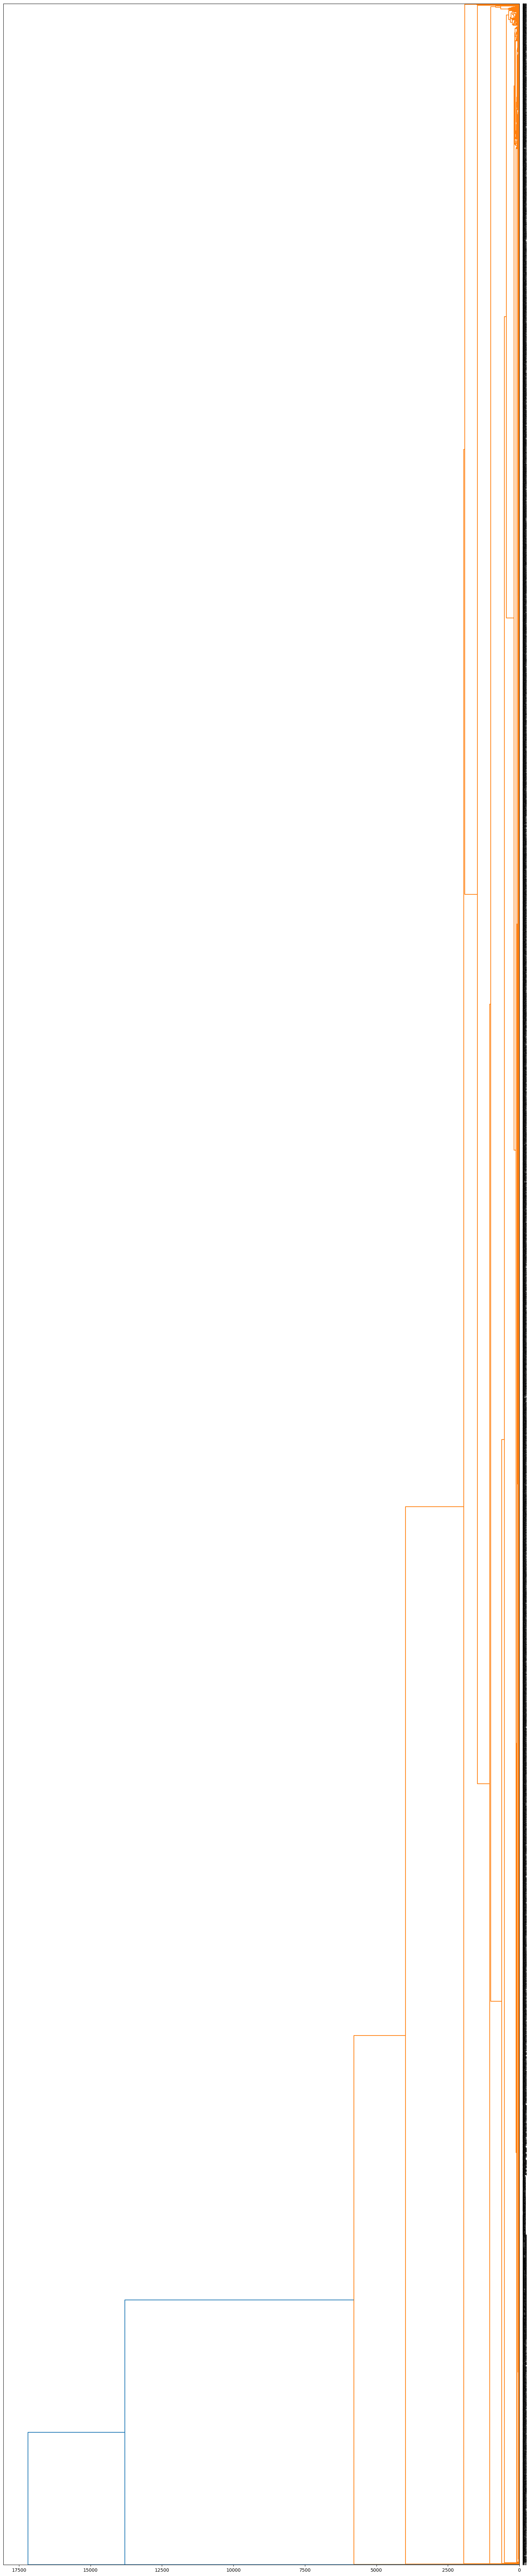

In [11]:
from scipy.cluster.hierarchy import linkage, dendrogram

genelessDf = dfParsed.drop(dfParsed.columns[0], axis=1)

distance_matrix = linkage(genelessDf.values, method='centroid', metric='euclidean')

fig, ax = plt.subplots(figsize=(20, 100))
dendrogram(distance_matrix, labels=genelessDf.index, orientation='left', ax=ax)
ax.tick_params(axis='y', labelsize=3)
plt.show()